## SVM 

*by Lena Nikolenko*

In order to deeper understand how Kernel trick works in SVM, I tried to predict classes for the following vectors: *A = [1, 0, 1.5], B = [-1, 2, -2], C = [0, 0.2, 0.7], D = [1, -2, 2.5]* using data from the file in this repository.

In [103]:
#Import necessary modules
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
sns.color_palette('Set2')

# Import sklearn library for machine learning
from sklearn.svm import SVC, LinearSVC

In [104]:
#Initialize the train data
train_df = pd.read_csv('svm_data.csv', index_col=False)
train_df = pd.DataFrame(train_df)

In [105]:
#Initialize the test data A = [1, 0, 1.5], B = [-1, 2, -2], C = [0, 0.2, 0.7], D = [1, -2, 2.5]
test_df = pd.DataFrame({
    'x':[1,-1,0,1],
    'y':[0,2,0.2,-2],
    'z':[1.5,-2,0.7,2.5]})

x1= test_df['x']
y2= test_df['y']
z3= test_df['z']
test_df['x^2'] = x1**2
test_df['y^2']= y2**2
test_df['z^2']= z3**2

Text(0.5, 0, 'Z')

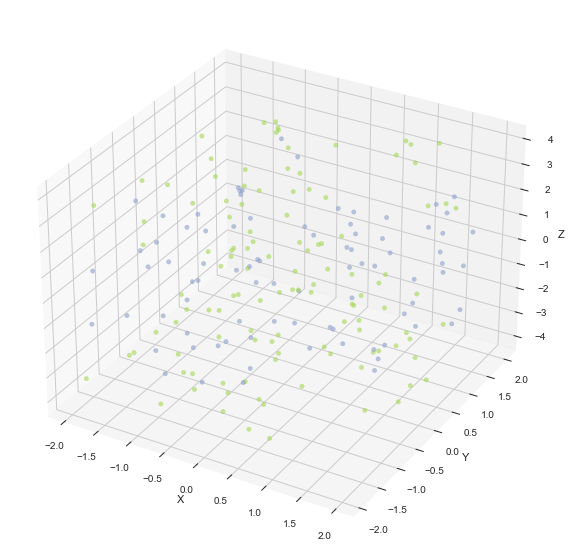

In [106]:
# Visualizing train data

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111,  projection='3d')

x= train_df['x']
y= train_df['y']
z= train_df['z']
dict_colors = {0: '#a6d854', 1:'#8da0cb'}
colors = list(map(lambda x: dict_colors[x], train_df['class']))

ax.scatter(x, y, z, alpha=0.6, marker='o',c=colors)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [107]:
#Initiating the training samples X and an array y of class labels
X=train_df[['x','y', 'z']]
label=train_df['class']

## Check different ways of Kernel trick implementation

In [108]:
#Linearly unseparable data and linear kernel
cla_X=SVC(kernel='linear')
cla_X.fit(X,label)
acc_X=cla_X.score(X, label)

In [109]:
#Modifying linearly unseparable data to separable by dot product
X_numpy = X.to_numpy()
dots = np.array([np.array([x.dot(x)]) for x in X_numpy])
X1 = np.hstack([X_numpy, dots])

cla_X1=SVC(kernel='linear')
cla_X1.fit(X1,label)
acc_X1=cla_X1.score(X1, label)

In [110]:
#Modifying linearly unseparable data to separable by parabolic function
X2=train_df[['x','y','z']]
X2['x^2'] = x**2
X2['y^2']= y**2
X2['z^2']= z**2

cla_X2=SVC(kernel='linear')
cla_X2.fit(X2,label)
acc_X2=cla_X2.score(X2, label)

In [111]:
#Linearly unseparable data and rbf kernel from sklearn-library
cla_rbf=SVC(kernel='rbf')
cla_rbf.fit(X,label)
acc_rbf=cla_rbf.score(X, label)

In [112]:
#Let's see results
results = pd.DataFrame({'Implementation':['Linear kernel', 'Dot product','Parabolic function','RBF kernel'],'Score': [acc_X, acc_X1, acc_X2, acc_rbf]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(4)

,Implementation
Score,
1.00,Parabolic function
0.94,RBF kernel
0.79,Dot product
0.58,Linear kernel


## Vizualization of the support vectors

In [113]:
# Checking supporting vectors
supp=cla_X2.support_vectors_

Text(0.5, 0, 'Z')

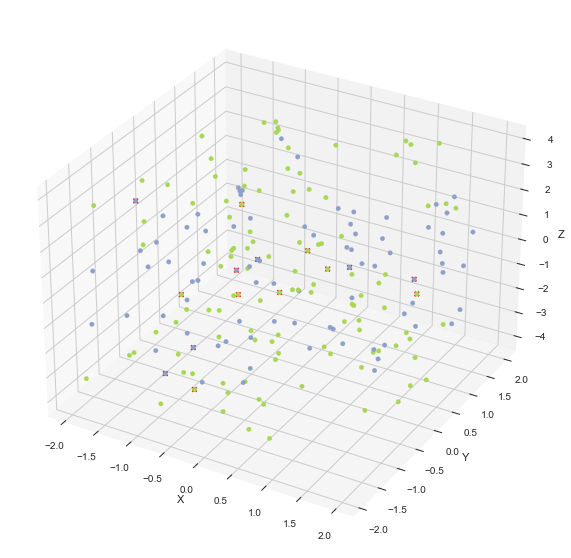

In [114]:
# Visualizing train data

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x= train_df['x']
y= train_df['y']
z= train_df['z']
dict_colors = {0: '#a6d854', 1:'#8da0cb'}
colors = list(map(lambda x: dict_colors[x], train_df['class']))

ax.scatter(x,y,z,alpha=1, marker='o',c=colors)
ax.scatter(supp[:,0],supp[:,1],supp[:,2],alpha=1,marker='x',c='red')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

## Prediction

In [115]:
#Let's predict class for our points
label_pred = cla_X2.predict(test_df)
label_pred

array([0, 1, 1, 0])

So, for points A = [1, 0, 1.5], B = [-1, 2, -2], C = [0, 0.2, 0.7], D = [1, -2, 2.5] classes are 0,1,1,0.